O dataset diabetes disponibilizado pelo scikit-learn é proveniente de uma pesquisa conduzida por Efron et al. (1976), no contexto do desenvolvimento de técnicas de regressão estatística, como o LASSO (Least Absolute Shrinkage and Selection Operator). Os dados foram originalmente coletados pela Clínica Médica da Universidade de Leiden, nos Países Baixos, para estudar a progressão da diabetes.

Attribute Information:
* age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

In [1]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('DiabetesOriginalA.csv')
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
0,59,feminino,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,masculino,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,feminino,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,masculino,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,masculino,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,feminino,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,feminino,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,feminino,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,masculino,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [2]:
#Resumo conciso do DataFrame, incluindo
#número total de entradas (ou linhas), nomes das colunas,
#tipo de dado de cada coluna, número de valores não nulos em cada coluna
#uso de memória do DataFrame.

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         442 non-null    int64  
 1   sex         442 non-null    object 
 2   bmi         398 non-null    float64
 3   bp          442 non-null    float64
 4   s1          442 non-null    int64  
 5   s2          442 non-null    float64
 6   s3          442 non-null    float64
 7   s4          442 non-null    float64
 8   s5          442 non-null    float64
 9   s6          442 non-null    int64  
 10  progressao  442 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB


In [3]:
#Frequência de valores únicos: quantos homens, quantas mulheres

diabetes['sex'].value_counts()

sex
masculino    235
feminino     207
Name: count, dtype: int64

In [4]:
#Resumo estatístico com várias métricas descritivas das colunas numéricas.
#Essas métricas ajudam a entender a distribuição dos dados.
#Estas métricas são: count, mean, std, min, primeiro quartil (Q1), 
#segundo quartil (Q2) (mediana), O terceiro quartil (Q3) e max

diabetes.describe()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
count,442.000000,398.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.356784,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.359678,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.100000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.125000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.200000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,41.300000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


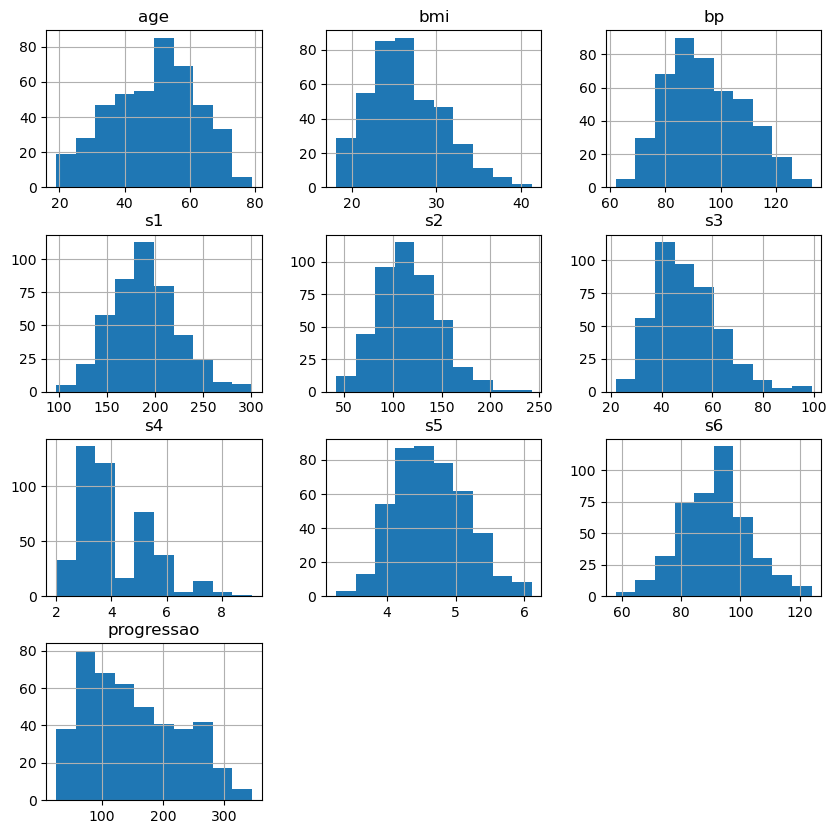

In [5]:
#histogramas

import matplotlib.pyplot as plt
diabetes.hist(bins=10, figsize=(10,10));

**Os histogramas**<br>
* **possuem só um pico**
* **não possuem outliers**
* **são assimétricos com caudas mais alongadas à direita (valores mais altos)**
* **são mais achatados (como a idade) ou mais afiados (como o s6) que a distribuição normal.**
* **possuem diferentes intervalos de valores, como 100 a 300 (s1) e 2 a 8 (s4).**<br>
**A progressao não se parece com uma distribuição normal e mostra que a maioria das pessoas está nos estágios iniciais da doença**

**Como saber se é uma distribuição normal sem ser no "olhômetro"?**

In [6]:
from scipy.stats import skew, kurtosis

soNumeros = diabetes.drop('sex', axis=1)
soNumeros = soNumeros.dropna(subset=['bmi'])

print(f"{'Feature':<12} {'Assimetria':>12} {'Curtose':>12}")
for c in soNumeros.columns:
    skew_ = skew(soNumeros[c])
    kurtosis_ = kurtosis(soNumeros[c])
    print(f"{c:<12} {skew_:>12.4f} {kurtosis_:>12.4f}")

Feature        Assimetria      Curtose
age               -0.2521      -0.7008
bmi                0.5691      -0.0422
bp                 0.2894      -0.5224
s1                 0.4116       0.2035
s2                 0.4931       0.6850
s3                 0.8315       1.0913
s4                 0.7410       0.3400
s5                 0.3033      -0.1108
s6                 0.2445       0.2557
progressao         0.4388      -0.8622


* Assimetria = 0: Distribuição perfeitamente simétrica (distribuição normal).
* entre -0,5 e 0,5: aproximadamente simétrica.<br>

* Assimetria > 0: Assimetria positiva ou assimetria à direita. A cauda da distribuição é mais longa à direita.<br>
>entre 0.5 e 1:  moderadamente assimétrica.<br>
>maior que 1: altamente assimétrica.<br>

* Assimetria < 0: Assimetria negativa ou assimetria à esquerda. A cauda da distribuição é mais longa à esquerda.<br>
>entre -1 e -0.5: moderadamente assimétrica.<br>
>menor que -1: altamente assimétrica.

**A curtose mede a "altura" do pico e a "grossura" das caudas em relação a uma distribuição normal.**<br>

* Curtose = 3: distribuição normal (ou mesocúrtica).
>Curtose próxima de 0: distribuição tem uma forma semelhante à normal.<br>

* Curtose > 3: distribuição leptocúrtica (mais afiada), com caudas mais longas e um pico mais alto.
>Curtose > 0: A distribuição tem caudas mais longas e um pico mais alto (leptocúrtica).

* Curtose < 3: A distribuição é platicúrtica (mais achatada), com caudas mais curtas e um pico mais baixo.
>Curtose < 0: A distribuição tem caudas mais curtas e é mais achatada (platicúrtica).

A biblioteca SciPy usa o NumPy como base, mas adiciona ferramentas e funções para cálculos mais complexos, especialmente em áreas científicas. Fornece funções para:<br>
Álgebra linear (resolução de sistemas de equações lineares, decomposições matriciais, etc.).<br>
Estatística (funções de probabilidade, distribuições, **testes estatísticos**).<br>
Otimização (minimização de funções, ajuste de curvas).<br>
Integração numérica.<br>
Transformadas de Fourier.<br>
Processamento de sinal.<br>
Processamento de imagem.

**<center>Concluindo a análise dos histogramas**<br><br>
* age é levemente assimétrica à esquerda ou possui assimetria negativa suave
* bp, s1, s5 e s6 possuem assimetria leve à direita
* bmi, s2, s3 e s4 possuem assimetria moderada à direita<br><br><br>

* age, bmi, bp e s5 possuem caudas mais curtas e picos mais achatados
* s1, s2, s3, s4 e s6 possuem tem caudas mais longas e picos mais altos

In [7]:
# Use o parâmetro stratify da função train_test_split() para que os 
# conjuntos de teste e treinamento tenham a mesma proporção masculino/feminino
# que o dataset original

from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(diabetes, test_size=0.2, random_state=42,
                                                  stratify=diabetes['sex'])

In [8]:
#exiba as 3 primeiras linhas dos conjuntos de treinamento e teste e mostre o tipo e o shape

In [9]:
strat_train_set.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
30,32,masculino,NaN,89.0,182,110.6,56.0,3.0,4.3438,89,129
251,34,feminino,35.5,120.0,233,146.6,34.0,7.0,5.5683,101,243
79,20,masculino,NaN,87.0,191,128.2,53.0,4.0,3.8918,85,113


In [10]:
type(strat_train_set), strat_train_set.shape

(pandas.core.frame.DataFrame, (353, 11))

In [11]:
strat_test_set.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
436,33,masculino,NaN,80.0,171,85.4,75.0,2.0,3.9703,80,48
69,53,masculino,22.1,93.0,134,76.2,46.0,3.0,4.0775,96,178
203,48,feminino,29.2,110.0,218,151.6,39.0,6.0,4.9200,98,222


In [12]:
type(strat_test_set), strat_test_set.shape

(pandas.core.frame.DataFrame, (89, 11))

In [13]:
#1 - Copiar o strat_train_set

diabetes_train = strat_train_set.copy()

In [14]:
#2 - Combinações de atributos

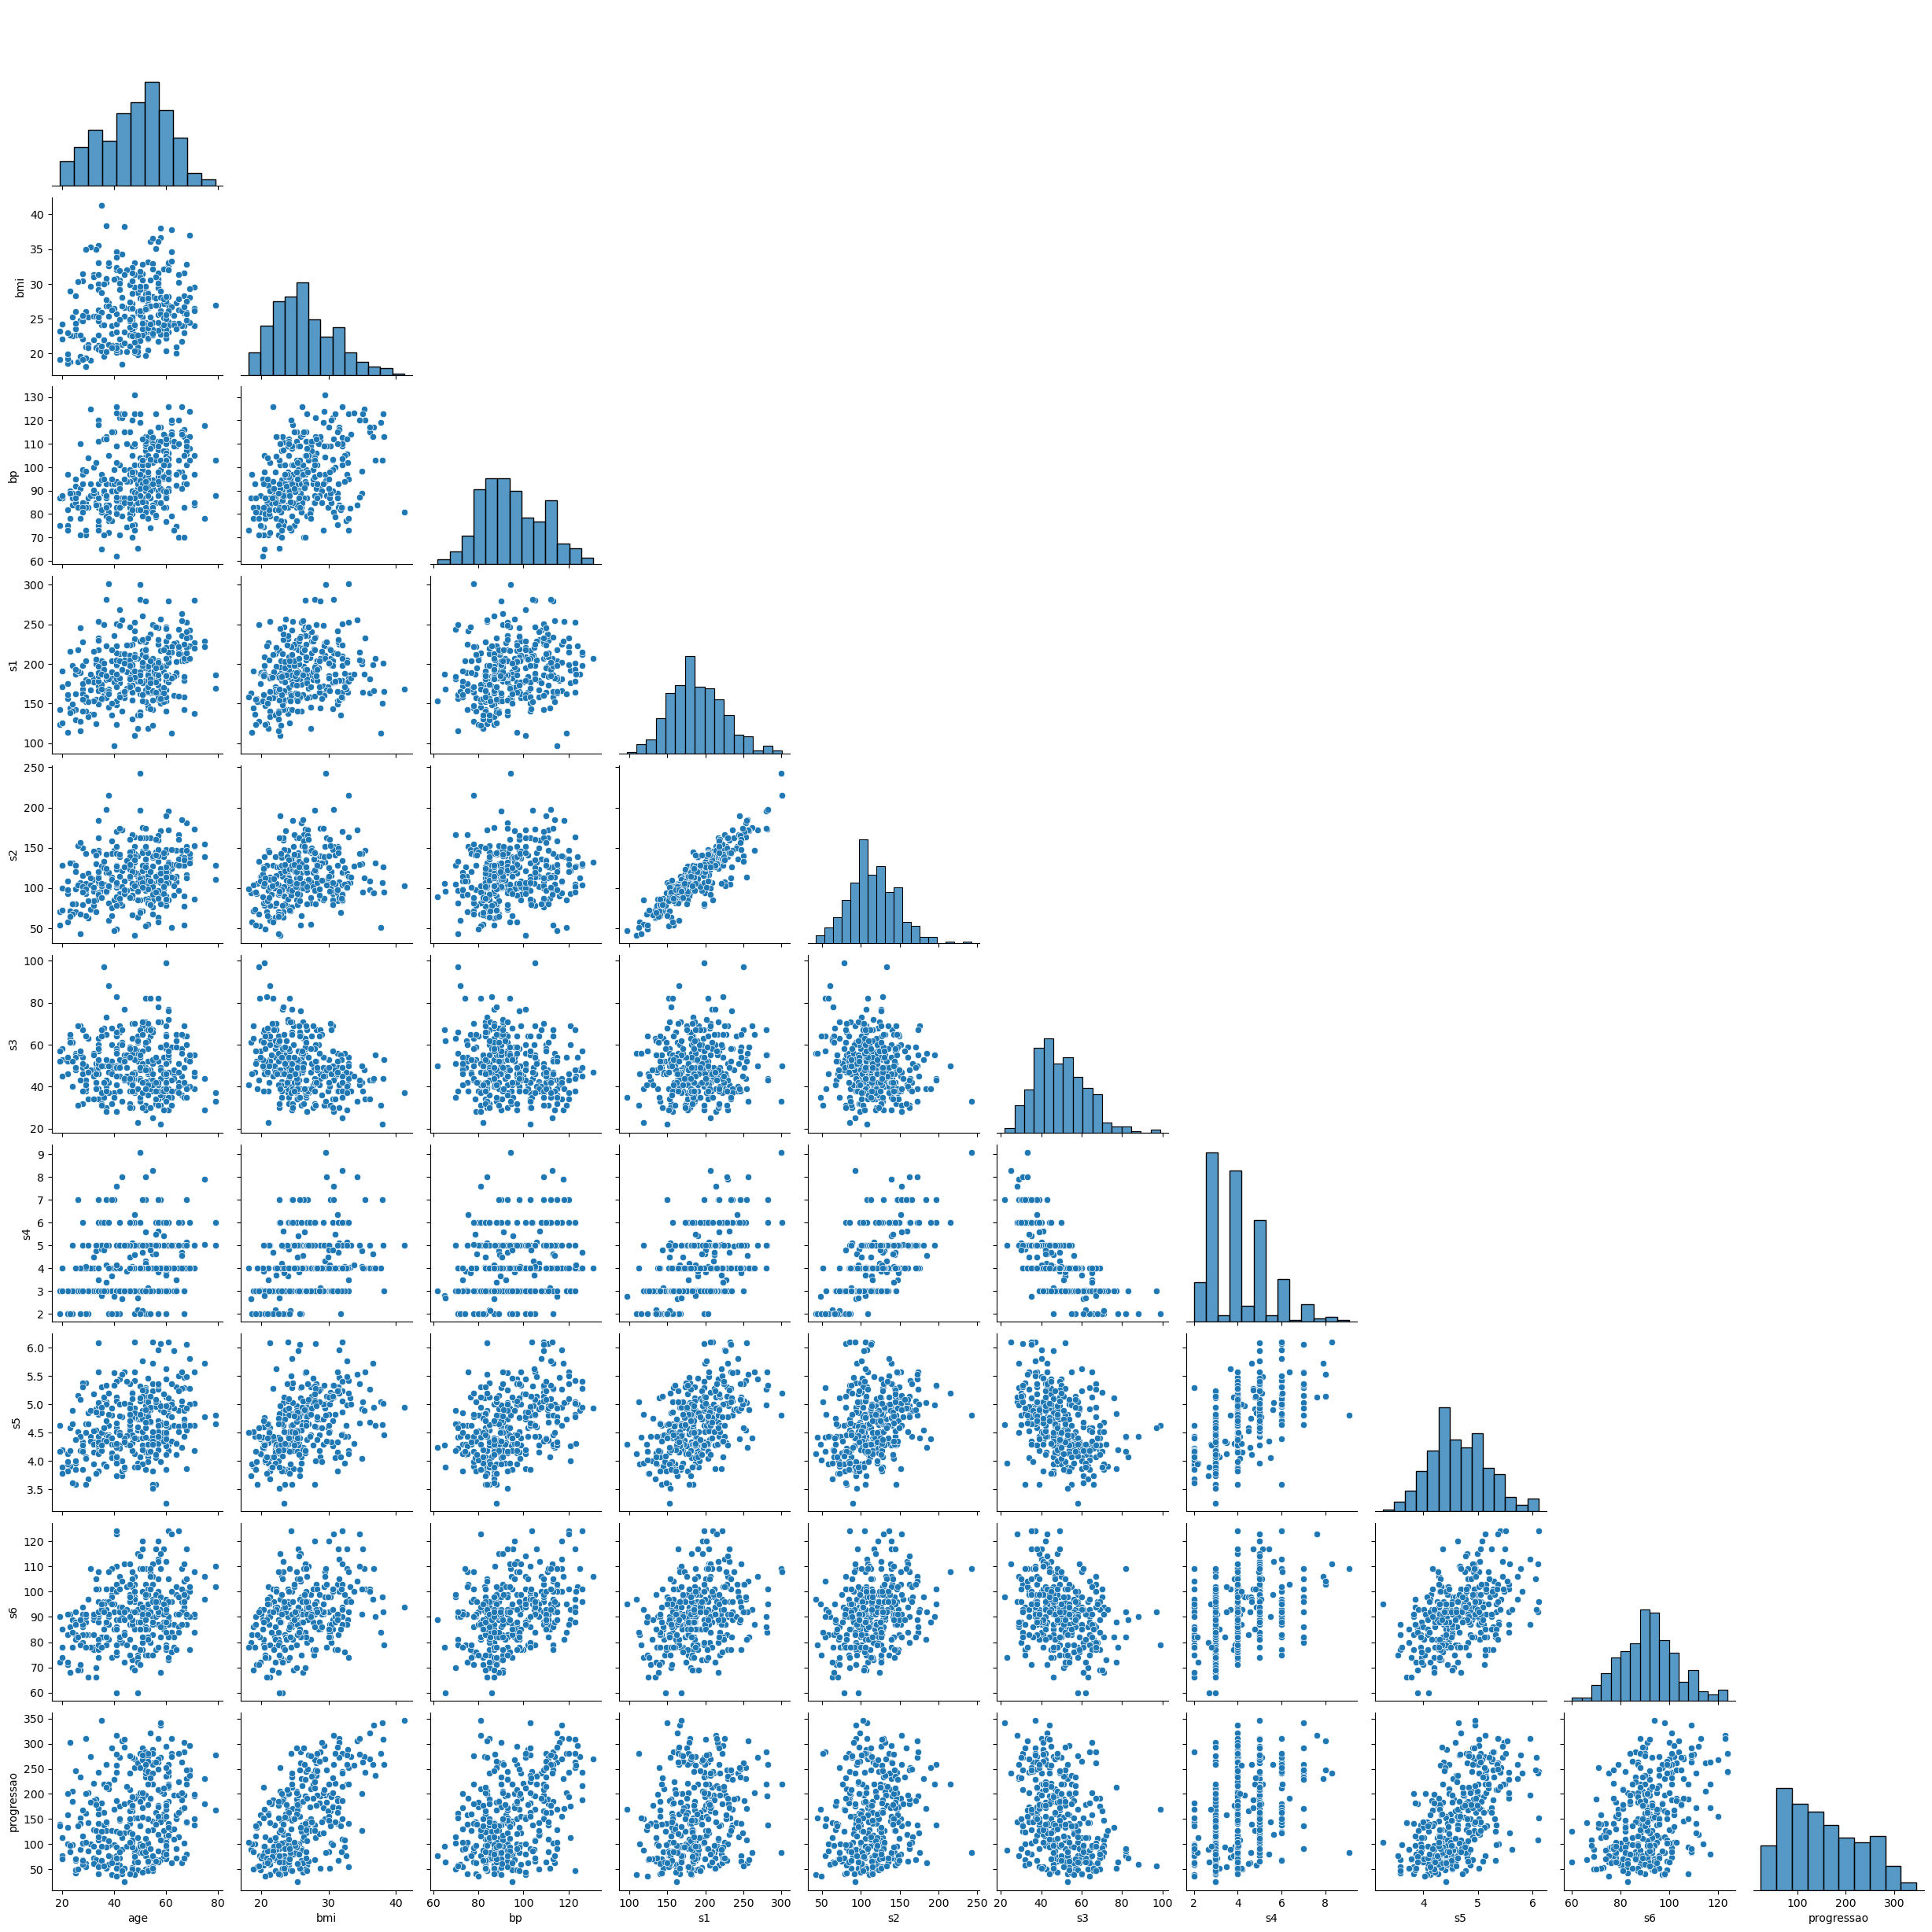

In [15]:
import seaborn as sns
sns.pairplot(diabetes_train, corner=True);

**O que procurar nestes gráficos?**<br>
**Resposta:**
* Relacionamentos lineares fortes entre features. Motivo: Se duas features forem altamente correlacionadas, pode valer a pena combiná-las ou excluir uma delas. Isto pode melhorar/facilitar o aprendizado e gerar um modelo melhor
* Relacionamento das features com o target. Motivo: as que estão fortemente correlacionadas são mais importantes para o aprendizado

In [16]:
#corr_matrix
#lembre de "dropar" variáveis categóricas
corr_matrix = diabetes_train.drop(['sex'], axis=1).corr()
corr_matrix['progressao'].sort_values(ascending=False)

progressao    1.000000
bmi           0.590404
s5            0.566602
bp            0.425162
s4            0.417333
s6            0.380797
age           0.223693
s1            0.217663
s2            0.160808
s3           -0.373049
Name: progressao, dtype: float64

In [17]:
# Escreva as suas descobertas
# bmi, s5 e bp, s4, s6 são as variáveis mais fortemente associadas à progressão da diabetes.
# As variáveis age, s1, s2 e s3 têm menos influência sobre a progressão.

In [18]:
# Combinações de featuress correlacionadas que podem melhorar a análise e a modelagem

diabetes_train['bmi_vezes_bp'] = diabetes_train['bmi'] * diabetes_train['bp']
diabetes_train['s5_vezes_s6'] = diabetes_train['s5'] * diabetes_train['s6']  # triglicerides glicose
diabetes_train['s2_por_s1'] = diabetes_train['s2'] / diabetes_train['s1']  # ldl e total serum cholesterol
diabetes_train['s2_vezes_s1'] = diabetes_train['s2'] * diabetes_train['s1']  # ldl e total serum cholesterol

In [19]:
#exiba o dataframe

diabetes_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao,bmi_vezes_bp,s5_vezes_s6,s2_por_s1,s2_vezes_s1
30,32,masculino,NaN,89.00,182,110.6,56.0,3.00,4.3438,89,129,NaN,386.5982,0.607692,20129.2
251,34,feminino,35.5,120.00,233,146.6,34.0,7.00,5.5683,101,243,4260.000,562.3983,0.629185,34157.8
79,20,masculino,NaN,87.00,191,128.2,53.0,4.00,3.8918,85,113,NaN,330.8030,0.671204,24486.2
111,54,masculino,26.8,87.00,206,122.0,68.0,3.00,4.3820,80,59,2331.600,350.5600,0.592233,25132.0
302,52,masculino,29.5,104.33,211,132.8,49.0,4.31,4.9836,98,198,3077.735,488.3928,0.629384,28020.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,49,masculino,22.7,65.33,168,96.2,62.0,2.71,3.8918,60,65,1482.991,233.5080,0.572619,16161.6
178,60,masculino,25.6,87.00,207,125.8,69.0,3.00,4.1109,84,81,2227.200,345.3156,0.607729,26040.6
218,37,masculino,20.3,83.00,185,124.6,38.0,5.00,4.7185,88,214,1684.900,415.2280,0.673514,23051.0
75,46,feminino,NaN,87.00,181,114.8,44.0,4.00,4.7095,98,42,NaN,461.5310,0.634254,20778.8


In [20]:
#corr_matrix novamente
corr_matrix = diabetes_train.drop(['sex'], axis=1).corr()
corr_matrix['progressao'].sort_values(ascending=False)

progressao      1.000000
bmi_vezes_bp    0.619652
bmi             0.590404
s5              0.566602
s5_vezes_s6     0.551922
bp              0.425162
s4              0.417333
s6              0.380797
age             0.223693
s1              0.217663
s2_vezes_s1     0.180502
s2              0.160808
s2_por_s1       0.033795
s3             -0.373049
Name: progressao, dtype: float64

In [21]:
# Escreva as suas descobertas
# A interação entre BMI e BP tem maior correlação com a progressão da diabetes do que BMI ou BP individualmente.
# Isto sugere que a interação entre obesidade e pressão arterial é realmente significativa para progressão da diabetes.
# A interação triglicérides e glicose também é significativa
# s2_vezes_s1 e s2_por_s1 têm pouca correlação com a progressão da diabetes

In [22]:
# se alguma combinação não ficou boa, "dropa"
# lembre-se do axis=1
# exiba as 3 primeiras linhas

diabetes_train = diabetes_train.drop(['s2_por_s1'], axis=1)
diabetes_train = diabetes_train.drop(['s2_vezes_s1'], axis=1)

diabetes_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao,bmi_vezes_bp,s5_vezes_s6
30,32,masculino,NaN,89.00,182,110.6,56.0,3.00,4.3438,89,129,NaN,386.5982
251,34,feminino,35.5,120.00,233,146.6,34.0,7.00,5.5683,101,243,4260.000,562.3983
79,20,masculino,NaN,87.00,191,128.2,53.0,4.00,3.8918,85,113,NaN,330.8030
111,54,masculino,26.8,87.00,206,122.0,68.0,3.00,4.3820,80,59,2331.600,350.5600
302,52,masculino,29.5,104.33,211,132.8,49.0,4.31,4.9836,98,198,3077.735,488.3928


In [23]:
#corr_matrix novamente
corr_matrix = diabetes_train.drop(['sex'], axis=1).corr()
corr_matrix['progressao'].sort_values(ascending=False)

progressao      1.000000
bmi_vezes_bp    0.619652
bmi             0.590404
s5              0.566602
s5_vezes_s6     0.551922
bp              0.425162
s4              0.417333
s6              0.380797
age             0.223693
s1              0.217663
s2              0.160808
s3             -0.373049
Name: progressao, dtype: float64

In [25]:
#3 - separar preditores e valores-alvos

diabetes_train_preds = diabetes_train.drop('progressao', axis=1)
diabetes_train_labels = strat_train_set['progressao'].copy()

In [1]:
#4 - Tratamento de valores ausentes com a classe Imputer

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

#lembre a mediana só pode ser calculada para valores numéricos
diabetes_train_preds_si = diabetes_train_preds.drop('sex', axis=1)

X = imputer.fit_transform(diabetes_train_preds_si)

contaNull=np.sum(np.isnan(X))
contaNull

NameError: name 'diabetes_train_preds' is not defined

In [27]:
X.shape, type(X)

((353, 11), numpy.ndarray)

In [28]:
#criar dataframe com valores ausentes resolvidos
#exibir info()
diabetes_train_preds_si = pd.DataFrame(X, columns=diabetes_train_preds_si.columns, index=diabetes_train_preds_si.index)
diabetes_train_preds_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353 entries, 30 to 112
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           353 non-null    float64
 1   bmi           353 non-null    float64
 2   bp            353 non-null    float64
 3   s1            353 non-null    float64
 4   s2            353 non-null    float64
 5   s3            353 non-null    float64
 6   s4            353 non-null    float64
 7   s5            353 non-null    float64
 8   s6            353 non-null    float64
 9   bmi_vezes_bp  353 non-null    float64
 10  s5_vezes_s6   353 non-null    float64
dtypes: float64(11)
memory usage: 33.1 KB


In [29]:
#5 - Manipulação de textos e atributos categóricos com a classe OneHotEncoder
#lembre que não pode ser unidimensional
#exiba o resultado

diabetes_train_cat = diabetes_train_preds[['sex']]

from sklearn.preprocessing import OneHotEncoder
cat_encode = OneHotEncoder()
diabetes_train_cat_1hot = cat_encode.fit_transform(diabetes_train_cat)

diabetes_train_cat_1hot

<353x2 sparse matrix of type '<class 'numpy.float64'>'
	with 353 stored elements in Compressed Sparse Row format>

In [30]:
#6 - Feature scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(diabetes_train_preds_si)

In [31]:
# criar dataframe escalado e juntar a variável categórica codificada
#exibir as 3 primeiras linhas

diabetes_train_preds_si_sc = pd.DataFrame(X,
                                 columns=diabetes_train_preds_si.columns,
                                 index=diabetes_train_preds_si.index)

diabetes_train_preds_si_sc_1hot = diabetes_train_preds_si_sc.copy()
diabetes_train_preds_si_sc_1hot[['masculino', 'feminino']]=diabetes_train_cat_1hot.toarray()

diabetes_train_preds_si_sc_1hot.head(3)

,age,bmi,bp,s1,s2,s3,s4,s5,s6,bmi_vezes_bp,s5_vezes_s6,masculino,feminino
30,-1.220411,-0.142142,-0.440642,-0.204632,-0.151217,0.505637,-0.831549,-0.585246,-0.200037,-0.083258,-0.466055,0.0,1.0
251,-1.066194,2.187206,1.816125,1.234425,1.012793,-1.236886,2.238437,1.721729,0.828307,2.697728,1.517008,1.0,0.0
79,-2.145713,-0.142142,-0.586240,0.049319,0.417855,0.268020,-0.064052,-1.436820,-0.542818,-0.083258,-1.095437,0.0,1.0


In [32]:
#7 - treinamento com cross validation

from sklearn.model_selection import cross_val_score

In [33]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg,
                              diabetes_train_preds_si_sc_1hot,
                              diabetes_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

# isto é para comparar depois
lin_rmse_cv=lin_rmse_scores.mean()
lin_rmse_cv

56.020975450381584

In [34]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_scores = cross_val_score(tree_reg,
                              diabetes_train_preds_si_sc_1hot,
                              diabetes_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

trees_rmse_scores = np.sqrt(-tree_scores)

trees_rmse_scores.mean()

77.32998664368337

In [35]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                              diabetes_train_preds_si_sc_1hot,
                              diabetes_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

forest_rmses = np.sqrt(-forest_scores)

forest_rmses.mean()

57.4156139064365

**<center><br>Avaliar no conjunto de teste**

In [38]:
# 1 - fazer cópia do strat_test_set
diabetes_test = strat_test_set.copy()
diabetes_test.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao
436,33,masculino,NaN,80.0,171,85.4,75.0,2.0,3.9703,80,48
69,53,masculino,22.1,93.0,134,76.2,46.0,3.0,4.0775,96,178
203,48,feminino,29.2,110.0,218,151.6,39.0,6.0,4.9200,98,222
303,69,masculino,29.6,122.0,231,128.4,56.0,4.0,5.4510,86,236
160,46,masculino,20.6,73.0,172,107.0,51.0,3.0,4.2485,80,53


In [40]:
# 2 - combinar features

diabetes_test['bmi_vezes_bp'] = diabetes_test['bmi'] * diabetes_test['bp']
diabetes_test['s5_vezes_s6'] = diabetes_test['s5'] * diabetes_test['s6']  # triglicerides glicose

diabetes_test

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progressao,bmi_vezes_bp,s5_vezes_s6
436,33,masculino,NaN,80.0,171,85.4,75.0,2.0,3.9703,80,48,NaN,317.6240
69,53,masculino,22.1,93.0,134,76.2,46.0,3.0,4.0775,96,178,2055.3,391.4400
203,48,feminino,29.2,110.0,218,151.6,39.0,6.0,4.9200,98,222,3212.0,482.1600
303,69,masculino,29.6,122.0,231,128.4,56.0,4.0,5.4510,86,236,3611.2,468.7860
160,46,masculino,20.6,73.0,172,107.0,51.0,3.0,4.2485,80,53,1503.8,339.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,36,masculino,22.8,87.0,178,116.0,41.0,4.0,4.6540,82,93,1983.6,381.6280
391,42,masculino,19.9,76.0,146,83.2,55.0,3.0,3.6636,79,63,1512.4,289.4244
2,72,feminino,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,2836.5,397.1880
211,74,masculino,NaN,101.0,171,104.8,50.0,3.0,4.3944,86,70,NaN,377.9184


In [42]:
# 3 separar preditores e valores-alvos

diabetes_test_preds = diabetes_test.drop('progressao', axis=1)
diabetes_test_labels = diabetes_test['progressao']

diabetes_test_labels

436     48
69     178
203    222
303    236
160     53
      ... 
221     93
391     63
2      141
211     70
340    216
Name: progressao, Length: 89, dtype: int64

In [43]:
diabetes_test_preds

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,bmi_vezes_bp,s5_vezes_s6
436,33,masculino,NaN,80.0,171,85.4,75.0,2.0,3.9703,80,NaN,317.6240
69,53,masculino,22.1,93.0,134,76.2,46.0,3.0,4.0775,96,2055.3,391.4400
203,48,feminino,29.2,110.0,218,151.6,39.0,6.0,4.9200,98,3212.0,482.1600
303,69,masculino,29.6,122.0,231,128.4,56.0,4.0,5.4510,86,3611.2,468.7860
160,46,masculino,20.6,73.0,172,107.0,51.0,3.0,4.2485,80,1503.8,339.8800
...,...,...,...,...,...,...,...,...,...,...,...,...
221,36,masculino,22.8,87.0,178,116.0,41.0,4.0,4.6540,82,1983.6,381.6280
391,42,masculino,19.9,76.0,146,83.2,55.0,3.0,3.6636,79,1512.4,289.4244
2,72,feminino,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,2836.5,397.1880
211,74,masculino,NaN,101.0,171,104.8,50.0,3.0,4.3944,86,NaN,377.9184


In [45]:
# 4 - remover valores nulos
diabetes_test_preds_si = diabetes_test_preds.drop('sex', axis=1)
diabetes_test_preds_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 436 to 340
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           89 non-null     int64  
 1   bmi           79 non-null     float64
 2   bp            89 non-null     float64
 3   s1            89 non-null     int64  
 4   s2            89 non-null     float64
 5   s3            89 non-null     float64
 6   s4            89 non-null     float64
 7   s5            89 non-null     float64
 8   s6            89 non-null     int64  
 9   bmi_vezes_bp  79 non-null     float64
 10  s5_vezes_s6   89 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 8.3 KB


In [46]:
imputer = SimpleImputer(strategy='median')
imputer.fit_transform(diabetes_test_preds_si)
diabetes_test_preds_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 436 to 340
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           89 non-null     int64  
 1   bmi           79 non-null     float64
 2   bp            89 non-null     float64
 3   s1            89 non-null     int64  
 4   s2            89 non-null     float64
 5   s3            89 non-null     float64
 6   s4            89 non-null     float64
 7   s5            89 non-null     float64
 8   s6            89 non-null     int64  
 9   bmi_vezes_bp  79 non-null     float64
 10  s5_vezes_s6   89 non-null     float64
dtypes: float64(8), int64(3)
memory usage: 8.3 KB


In [49]:
X = imputer.fit_transform(diabetes_test_preds_si)
#X

In [48]:
contaNull = np.sum(np.isnan(X))
contaNull

0

In [51]:
# montar um daframe com o X
diabetes_test_preds_si = pd.DataFrame(X,
                                     columns=diabetes_test_preds_si.columns,
                                     index=diabetes_test_preds_si.index)
diabetes_test_preds_si.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89 entries, 436 to 340
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           89 non-null     float64
 1   bmi           89 non-null     float64
 2   bp            89 non-null     float64
 3   s1            89 non-null     float64
 4   s2            89 non-null     float64
 5   s3            89 non-null     float64
 6   s4            89 non-null     float64
 7   s5            89 non-null     float64
 8   s6            89 non-null     float64
 9   bmi_vezes_bp  89 non-null     float64
 10  s5_vezes_s6   89 non-null     float64
dtypes: float64(11)
memory usage: 8.3 KB


In [52]:
# 5 - OneHotEncoder
diabetes_test_cat = diabetes_test_preds[['sex']]
type(diabetes_test_cat), diabetes_test_cat.shape

(pandas.core.frame.DataFrame, (89, 1))

In [53]:
diabetes_test_cat_1hot = cat_encode.fit_transform(diabetes_test_cat)
diabetes_test_cat_1hot

<89x2 sparse matrix of type '<class 'numpy.float64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [55]:
# 6 - scaler
X = scaler.fit_transform(diabetes_test_preds_si)
#X

In [56]:
# criar dataframe escalado
diabetes_test_preds_si_sc = pd.DataFrame(X,                                        
                                     columns=diabetes_test_preds_si.columns,
                                     index=diabetes_test_preds_si.index)

In [57]:
diabetes_test_preds_si_sc_1hot = diabetes_test_preds_si_sc.copy()

diabetes_test_preds_si_sc_1hot[['masculino',
                               'feminino']]=diabetes_test_cat_1hot.toarray()

diabetes_test_preds_si_sc_1hot

,age,bmi,bp,s1,s2,s3,s4,s5,s6,bmi_vezes_bp,s5_vezes_s6,masculino,feminino
436,-1.380116,-0.170080,-0.930577,-0.573278,-1.092438,1.751395,-1.639584,-1.287626,-1.024019,-0.112894,-1.257640,0.0,1.0
69,0.131642,-1.080386,-0.002663,-1.771883,-1.419993,-0.319311,-0.827050,-1.064791,0.470041,-0.693033,-0.352583,0.0,1.0
203,-0.246298,0.766236,1.210764,0.949275,1.264536,-0.819136,1.610552,0.686501,0.656799,1.348483,0.759733,1.0,0.0
303,1.341048,0.870271,2.067301,1.370407,0.438527,0.394726,-0.014516,1.790283,-0.463746,2.053050,0.595754,0.0,1.0
160,-0.397473,-1.470518,-1.430224,-0.540883,-0.323395,0.037708,-0.827050,-0.709336,-1.024019,-1.666401,-0.984759,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-1.153353,-0.898325,-0.430931,-0.346515,-0.002960,-0.676329,-0.014516,0.133571,-0.837261,-0.819579,-0.472888,0.0,1.0
391,-0.699825,-1.652579,-1.216089,-1.383146,-1.170766,0.323322,-0.827050,-1.925159,-1.117398,-1.651223,-1.603394,0.0,1.0
2,1.567812,1.104350,-0.002663,-1.059199,-0.800486,-0.676329,-0.014516,0.172650,-0.557125,0.685745,-0.282107,1.0,0.0
211,1.718988,-0.170080,0.568362,-0.573278,-0.401723,-0.033696,-0.827050,-0.406056,-0.463746,-0.112894,-0.518371,0.0,1.0


In [58]:
type(diabetes_test_preds_si_sc_1hot), diabetes_test_preds_si_sc_1hot.shape

(pandas.core.frame.DataFrame, (89, 13))

In [59]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_scores = cross_val_score(lin_reg,
                              diabetes_train_preds_si_sc_1hot,
                              diabetes_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)

# isto é para comparar depois
lin_rmse_cv=lin_rmse_scores.mean()
lin_rmse_cv

56.020975450381584

In [60]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()

tree_scores = cross_val_score(tree_reg,
                              diabetes_train_preds_si_sc_1hot,
                              diabetes_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

trees_rmse_scores = np.sqrt(-tree_scores)

trees_rmse_scores.mean()

75.88229157361317

In [61]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                              diabetes_train_preds_si_sc_1hot,
                              diabetes_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

forest_rmses = np.sqrt(-forest_scores)

forest_rmses.mean()

58.34837946272675

In [69]:
diabetesSP = pd.read_csv('DiabetesOriginalA.csv')

diabetesSP = diabetesSP.drop('sex', axis=1)

diabetesSP_train_preds = diabetesSP.drop('progressao', axis=1)
diabetesSP_train_labels = diabetesSP['progressao'].copy()

In [70]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(forest_reg,
                              diabetesSP_train_preds,
                              diabetesSP_train_labels,
                              scoring='neg_mean_squared_error',
                              cv=10)

forest_rmses = np.sqrt(-forest_scores)

forest_rmses.mean()

59.42411796680225